# Extracting data

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os
import cv2
from tqdm import tqdm

DATADIR = "C:/Users/Rudra/Documents/Projects/AI studies/Identifier/Source Images"

CATEGORIES = ["Anish", "Chaitu", "Rudra"]

for category in CATEGORIES:  # do dogs and cats
    path = os.path.join(DATADIR,category)  # create path to dogs and cats
    for img in os.listdir(path):  # iterate over each image per dogs and cats
        img_array = cv2.imread(os.path.join(path,img) ,cv2.IMREAD_GRAYSCALE)  # convert to array
        plt.imshow(img_array, cmap='gray')  # graph it
        plt.show()  # display!

        break  # we just want one for now so break
    break  #...and one more!

<Figure size 640x480 with 1 Axes>

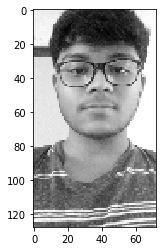

In [2]:
#Aspect Ratio is 16:9
IMG_SIZE_X = 72
IMG_SIZE_Y = 128

new_array = cv2.resize(img_array, (IMG_SIZE_X, IMG_SIZE_Y))
plt.imshow(new_array, cmap='gray')
plt.show()

In [3]:
training_data = []

def create_training_data():
    for category in CATEGORIES:  # do dogs and cats

        path = os.path.join(DATADIR,category)  # create path to dogs and cats
        class_num = CATEGORIES.index(category)  # get the classification  (0 or a 1). 0=dog 1=cat
        IMG_SIZE_X = 72
        IMG_SIZE_Y = 128
        for img in tqdm(os.listdir(path)):  # iterate over each image per dogs and cats
            try:
                img_array = cv2.imread(os.path.join(path,img) ,cv2.IMREAD_GRAYSCALE)  # convert to array
                new_array = cv2.resize(img_array, (IMG_SIZE_X, IMG_SIZE_Y))  # resize to normalize data size
                training_data.append([new_array, class_num])  # add this to our training_data
            except Exception as e:  # in the interest in keeping the output clean...
                pass
            #except OSError as e:
            #    print("OSErrroBad img most likely", e, os.path.join(path,img))
            #except Exception as e:
            #    print("general exception", e, os.path.join(path,img))

create_training_data()

print(len(training_data))

100%|████████████████████████████████████████████████████████████████████████████████| 583/583 [00:12<00:00, 48.03it/s]


1590


In [4]:
import random

random.shuffle(training_data)

In [5]:
x=[]
y=[]

for features,label in training_data:
    x.append(features)
    y.append(label)

#print(x[0].reshape(-1,IMG_SIZE,IMG_SIZE,1))

x = np.array(x).reshape(-1,IMG_SIZE_X,IMG_SIZE_Y,1)

In [6]:
import pickle

pickle_out = open("X.pickle","wb")
pickle.dump(x, pickle_out)
pickle_out.close()

pickle_out = open("y.pickle","wb")
pickle.dump(y, pickle_out)
pickle_out.close()

# using pickle

In [7]:
pickle_in = open("X.pickle","rb")
x = pickle.load(pickle_in)

pickle_in = open("y.pickle","rb")
y = pickle.load(pickle_in)

In [8]:
import tensorflow as tf
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.callbacks import TensorBoard
import pickle
import time
import os

gpu_options = tf.GPUOptions(per_process_gpu_memory_fraction = 0.333)
sess = tf.Session(config = tf.ConfigProto(gpu_options = gpu_options))

pickle_in = open("X.pickle","rb")
x = pickle.load(pickle_in)

pickle_in = open("y.pickle","rb")
y = pickle.load(pickle_in)

#to reshape it to 0-1
x = x/255.0

In [17]:
dense_layers = [0]
layer_sizes = [64]
conv_layers = [3]

for dense_layer in dense_layers:
    for layer_size in layer_sizes:
        for conv_layer in conv_layers:
            
            NAME = "{}-conv-{}-nodes-{}-dense-{}".format(conv_layer, layer_size, dense_layer, int(time.time()))
            
            log_dir = os.path.join("logs",NAME)
            
            tensorboard = TensorBoard(log_dir)
            #run tensorboard: tensorboard --log_dir=logs/
            
            print(NAME)
            
            model = Sequential()

            model.add(Conv2D(layer_size,(3,3), input_shape = x.shape[1:]))
            model.add(Activation('relu'))
            model.add(MaxPooling2D(pool_size=(2,2)))

            for l in range(conv_layer-1):
                model.add(Conv2D(layer_size,(3,3)))
                model.add(Activation('relu'))
                model.add(MaxPooling2D(pool_size=(2,2)))

            model.add(Flatten()) #this converts our 3D features to 1D features
            for l in range(dense_layer):
                model.add(Dense(256))
                model.add(Activation('relu'))
            
            model.add(Dense(3))
            model.add(Activation('sigmoid'))

            model.compile(loss='sparse_categorical_crossentropy',
                         optimizer='adam',
                         metrics=['accuracy'])
            
            model.fit(x, y, batch_size = 32, epochs=3, validation_split = 0.3, callbacks=[tensorboard])

3-conv-64-nodes-0-dense-1569510296
Train on 1113 samples, validate on 477 samples
Epoch 1/3
1113/1113 [==============================] - ETA: 19s - loss: 1.1014 - acc: 0.34 - ETA: 14s - loss: 1.1129 - acc: 0.34 - ETA: 13s - loss: 1.1091 - acc: 0.29 - ETA: 12s - loss: 1.1032 - acc: 0.35 - ETA: 11s - loss: 1.0946 - acc: 0.41 - ETA: 10s - loss: 1.0961 - acc: 0.40 - ETA: 10s - loss: 1.0920 - acc: 0.42 - ETA: 11s - loss: 1.0925 - acc: 0.41 - ETA: 11s - loss: 1.0855 - acc: 0.42 - ETA: 10s - loss: 1.0854 - acc: 0.41 - ETA: 9s - loss: 1.0784 - acc: 0.4347 - ETA: 9s - loss: 1.0720 - acc: 0.442 - ETA: 8s - loss: 1.0674 - acc: 0.447 - ETA: 8s - loss: 1.0567 - acc: 0.462 - ETA: 8s - loss: 1.0458 - acc: 0.475 - ETA: 7s - loss: 1.0343 - acc: 0.484 - ETA: 7s - loss: 1.0231 - acc: 0.492 - ETA: 7s - loss: 1.0060 - acc: 0.512 - ETA: 6s - loss: 0.9874 - acc: 0.528 - ETA: 6s - loss: 0.9633 - acc: 0.545 - ETA: 5s - loss: 0.9424 - acc: 0.558 - ETA: 5s - loss: 0.9260 - acc: 0.569 - ETA: 4s - loss: 0.9073 - a

In [18]:
model.save("64x3-CNN.model")

  0%|                                                                                           | 0/10 [00:00<?, ?it/s]

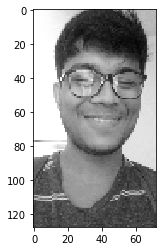

[[0. 0. 0.]]
Anish


 10%|████████▎                                                                          | 1/10 [00:00<00:05,  1.79it/s]

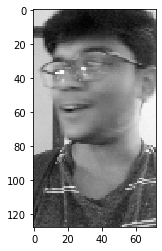

[[0. 0. 0.]]
Anish


 20%|████████████████▌                                                                  | 2/10 [00:00<00:03,  2.18it/s]

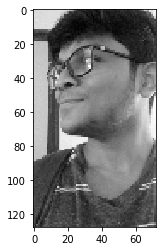

[[0. 0. 0.]]
Anish


 30%|████████████████████████▉                                                          | 3/10 [00:01<00:02,  2.58it/s]

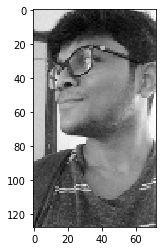

[[0. 0. 0.]]
Anish


 40%|█████████████████████████████████▏                                                 | 4/10 [00:01<00:02,  2.90it/s]

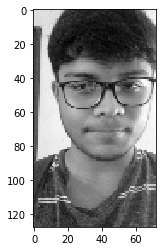

[[0. 0. 0.]]
Anish


 50%|█████████████████████████████████████████▌                                         | 5/10 [00:01<00:01,  3.18it/s]

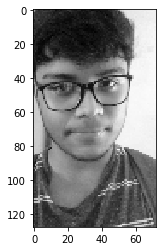

[[0. 0. 0.]]
Anish


 60%|█████████████████████████████████████████████████▊                                 | 6/10 [00:01<00:01,  3.47it/s]

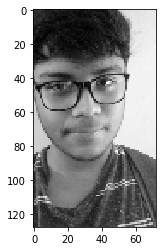

[[0. 0. 0.]]
Anish


 70%|██████████████████████████████████████████████████████████                         | 7/10 [00:01<00:00,  3.77it/s]

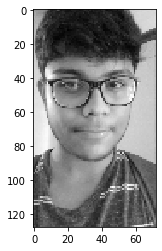

[[0. 0. 0.]]
Anish


 80%|██████████████████████████████████████████████████████████████████▍                | 8/10 [00:02<00:00,  4.02it/s]

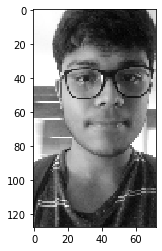

[[0. 0. 0.]]
Anish


 90%|██████████████████████████████████████████████████████████████████████████▋        | 9/10 [00:02<00:00,  4.10it/s]

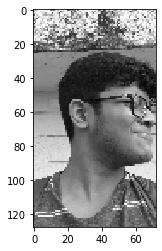

[[0. 0. 0.]]
Anish


  0%|                                                                                           | 0/10 [00:00<?, ?it/s]

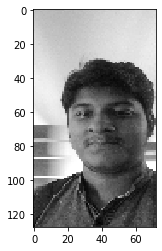

[[0. 0. 0.]]
Anish


 10%|████████▎                                                                          | 1/10 [00:00<00:01,  5.06it/s]

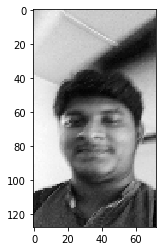

[[0. 0. 0.]]
Anish


 20%|████████████████▌                                                                  | 2/10 [00:00<00:01,  4.94it/s]

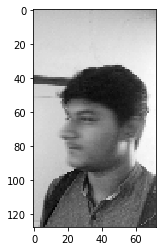

[[0. 0. 0.]]
Anish


 30%|████████████████████████▉                                                          | 3/10 [00:00<00:01,  4.91it/s]

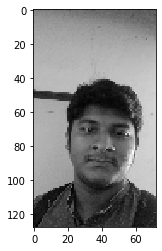

[[0. 0. 0.]]
Anish


 40%|█████████████████████████████████▏                                                 | 4/10 [00:00<00:01,  4.74it/s]

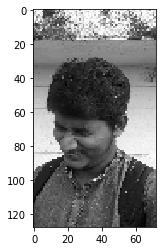

[[0. 0. 0.]]
Anish


 50%|█████████████████████████████████████████▌                                         | 5/10 [00:01<00:01,  4.66it/s]

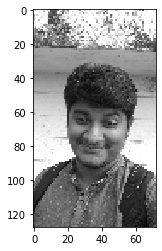

[[0. 0. 0.]]
Anish


 60%|█████████████████████████████████████████████████▊                                 | 6/10 [00:01<00:00,  4.67it/s]

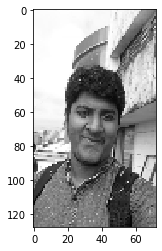

[[0. 0. 0.]]
Anish


 70%|██████████████████████████████████████████████████████████                         | 7/10 [00:01<00:00,  4.72it/s]

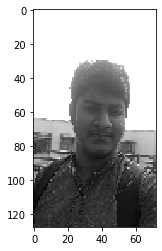

[[0. 0. 0.]]
Anish


 80%|██████████████████████████████████████████████████████████████████▍                | 8/10 [00:01<00:00,  4.58it/s]

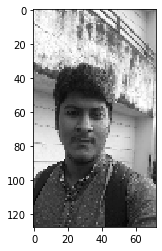

[[0. 0. 0.]]
Anish


 90%|██████████████████████████████████████████████████████████████████████████▋        | 9/10 [00:01<00:00,  4.42it/s]

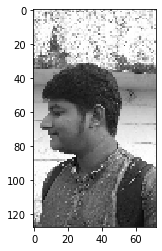

[[0. 0. 0.]]
Anish


  0%|                                                                                           | 0/10 [00:00<?, ?it/s]

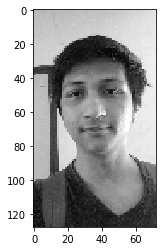

[[0. 0. 0.]]
Anish


 10%|████████▎                                                                          | 1/10 [00:00<00:01,  4.82it/s]

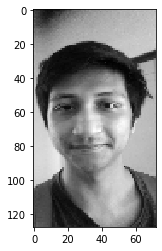

[[0. 0. 0.]]
Anish


 20%|████████████████▌                                                                  | 2/10 [00:00<00:01,  4.70it/s]

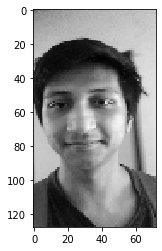

[[0. 0. 0.]]
Anish


 30%|████████████████████████▉                                                          | 3/10 [00:00<00:01,  4.66it/s]

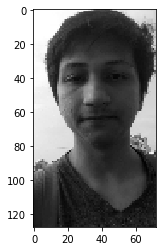

[[0. 0. 0.]]
Anish


 40%|█████████████████████████████████▏                                                 | 4/10 [00:00<00:01,  4.68it/s]

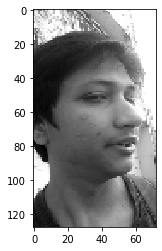

[[0. 0. 0.]]
Anish


 50%|█████████████████████████████████████████▌                                         | 5/10 [00:01<00:01,  4.73it/s]

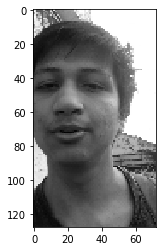

[[0. 0. 0.]]
Anish


 60%|█████████████████████████████████████████████████▊                                 | 6/10 [00:01<00:00,  4.91it/s]

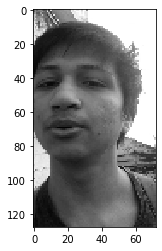

[[0. 0. 0.]]
Anish


 70%|██████████████████████████████████████████████████████████                         | 7/10 [00:01<00:00,  4.85it/s]

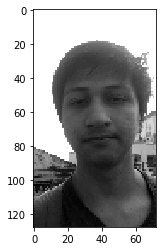

[[0. 0. 0.]]
Anish


 80%|██████████████████████████████████████████████████████████████████▍                | 8/10 [00:01<00:00,  4.87it/s]

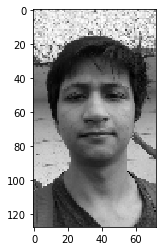

[[0. 0. 0.]]
Anish


 90%|██████████████████████████████████████████████████████████████████████████▋        | 9/10 [00:01<00:00,  4.79it/s]

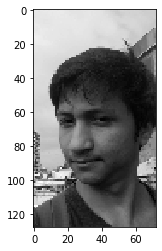

[[0. 0. 0.]]
Anish


100%|██████████████████████████████████████████████████████████████████████████████████| 10/10 [00:02<00:00,  4.79it/s]


In [37]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import os
import cv2
from tqdm import tqdm
import random

CATEGORIES = ["Anish", "Chaitu", "Rudra"]

pathx = "C:/Users/Rudra/Documents/Projects/AI studies/Identifier/Test Images"

model = tf.keras.models.load_model("64x3-CNN.model")

testing_data = []

def print_testing_data():
    for category in CATEGORIES:  # do dogs and cats
        path = os.path.join(pathx,category)  # create path to dogs and cats
        class_num = CATEGORIES.index(category)  # get the classification  (0 or a 1). 0=dog 1=cat
        IMG_SIZE_X = 72
        IMG_SIZE_Y = 128
        for img in tqdm(os.listdir(path)):  # iterate over each image per dogs and cats
            try:
                i=0
                img_array = cv2.imread(os.path.join(path,img) ,cv2.IMREAD_GRAYSCALE)  # convert to array
                new_array = cv2.resize(img_array, (IMG_SIZE_X, IMG_SIZE_Y))  # resize to normalize data siz
                
                plt.imshow(new_array, cmap='gray')  # graph it
                plt.show() 
                
                new_array = np.array(new_array).reshape(-1,IMG_SIZE_X,IMG_SIZE_Y,1)
                testing_data.append([new_array, class_num])  # add this to our training_data
                
                prediction = model.predict(testing_data[i])
                print(prediction)  # will be a list in a list.
                print(CATEGORIES[int(prediction[0][0])])
                i=i+1
            except Exception as e:  # in the interest in keeping the output clean...
                pass
            #except OSError as e:
            #    print("OSErrroBad img most likely", e, os.path.join(path,img))
            #except Exception as e:
            #    print("general exception", e, os.path.join(path,img))

print_testing_data()

#print(len(testing_data))

#random.shuffle(testing_data)